In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
from datetime import timezone
from dateutil.tz import *
import matplotlib.dates as mdates
from datetime import timedelta
import os
from model_utils import *
import matplotlib.dates as dates
import matplotlib as mpl
from scipy import stats
from amisr_utils import *
#from magnetometer_utils import *
#from iri2016 import timeprofile, timeprofile2

In [2]:
year = 2021
doy1 = 221#221#218#218 # 6 de agosto del 2021
doy2 = 218
d1 = datetime.datetime.strptime('{} {}'.format(doy1, year),'%j %Y')
d2 = datetime.datetime.strptime('{} {}'.format(doy2, year),'%j %Y')
month = d1.month
day1 = d1.day
day2 = d2.day
print(year,month,day1,doy1)
print(year,month,day2,doy2)

2021 8 9 221
2021 8 6 218


In [3]:
dt_julia1, height_julia1, snr_julia1 = GetRTI_JULIA(year,doy1)
dt_julia2, height_julia2, snr_julia2 = GetRTI_JULIA(year,doy2)


delta_range [3.75]
delta_range [3.75]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


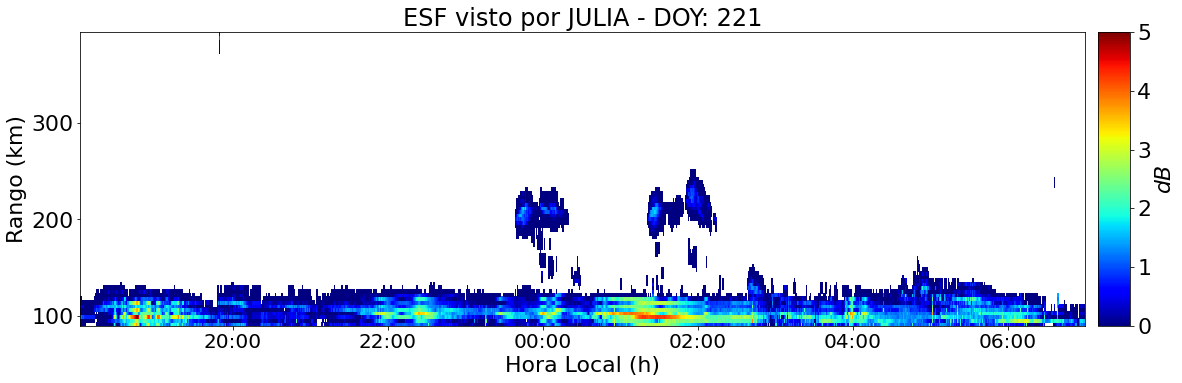

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))
#clrs= ax.pcolormesh(mdates.date2num(dt_final), temp, 10*np.log10(array_final.T/(numInt*numFFT)),cmap=mpl.cm.Blues)#'jet')
clrs= ax.pcolormesh(mdates.date2num(dt_julia1), height_julia1, snr_julia1,cmap='jet')#'RdBu_r')#'jet')

ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("Hora Local (h)", fontsize=22)
ax.set_ylabel("Rango (km)", fontsize=22)
ax.tick_params(axis='x', labelsize=20)#, rotation=0)
ax.tick_params(axis='y', labelsize=22)
plt.title('ESF visto por JULIA - DOY: %d' % doy1, fontsize=24)
plt.xticks(rotation=0)
fig.autofmt_xdate()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
cb.set_label(r'$dB$', fontsize=22)
cb.mappable.set_clim(0,5)
cb.ax.tick_params(labelsize=22) 

In [5]:
dt_amisr1, height_amisr1, snr_amisr1 = GetRTI_AMISR(year, doy1)
dt_amisr2, height_amisr2, snr_amisr2 = GetRTI_AMISR(year, doy2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


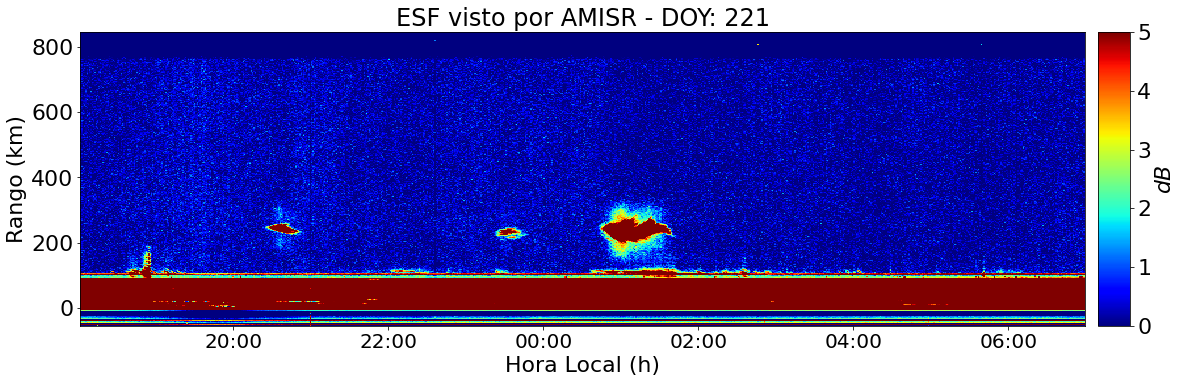

In [6]:
fig, ax = plt.subplots(figsize=(18, 6))
#clrs= ax.pcolormesh(mdates.date2num(dt_final), temp, 10*np.log10(array_final.T/(numInt*numFFT)),cmap=mpl.cm.Blues)#'jet')
clrs= ax.pcolormesh(mdates.date2num(dt_amisr1), height_amisr1, snr_amisr1.T,cmap='jet')#'RdBu_r')#'jet')

ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("Hora Local (h)", fontsize=22)
ax.set_ylabel("Rango (km)", fontsize=22)
ax.tick_params(axis='x', labelsize=20)#, rotation=0)
ax.tick_params(axis='y', labelsize=22)
plt.title('ESF visto por AMISR - DOY: %d' % doy1, fontsize=24)
plt.xticks(rotation=0)
fig.autofmt_xdate()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=ax.get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
cb.set_label(r'$dB$', fontsize=22)
#cb.mappable.set_clim(2,10)
#cb.mappable.set_clim(-2,4)
cb.mappable.set_clim(0,5)

cb.ax.tick_params(labelsize=22) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, 

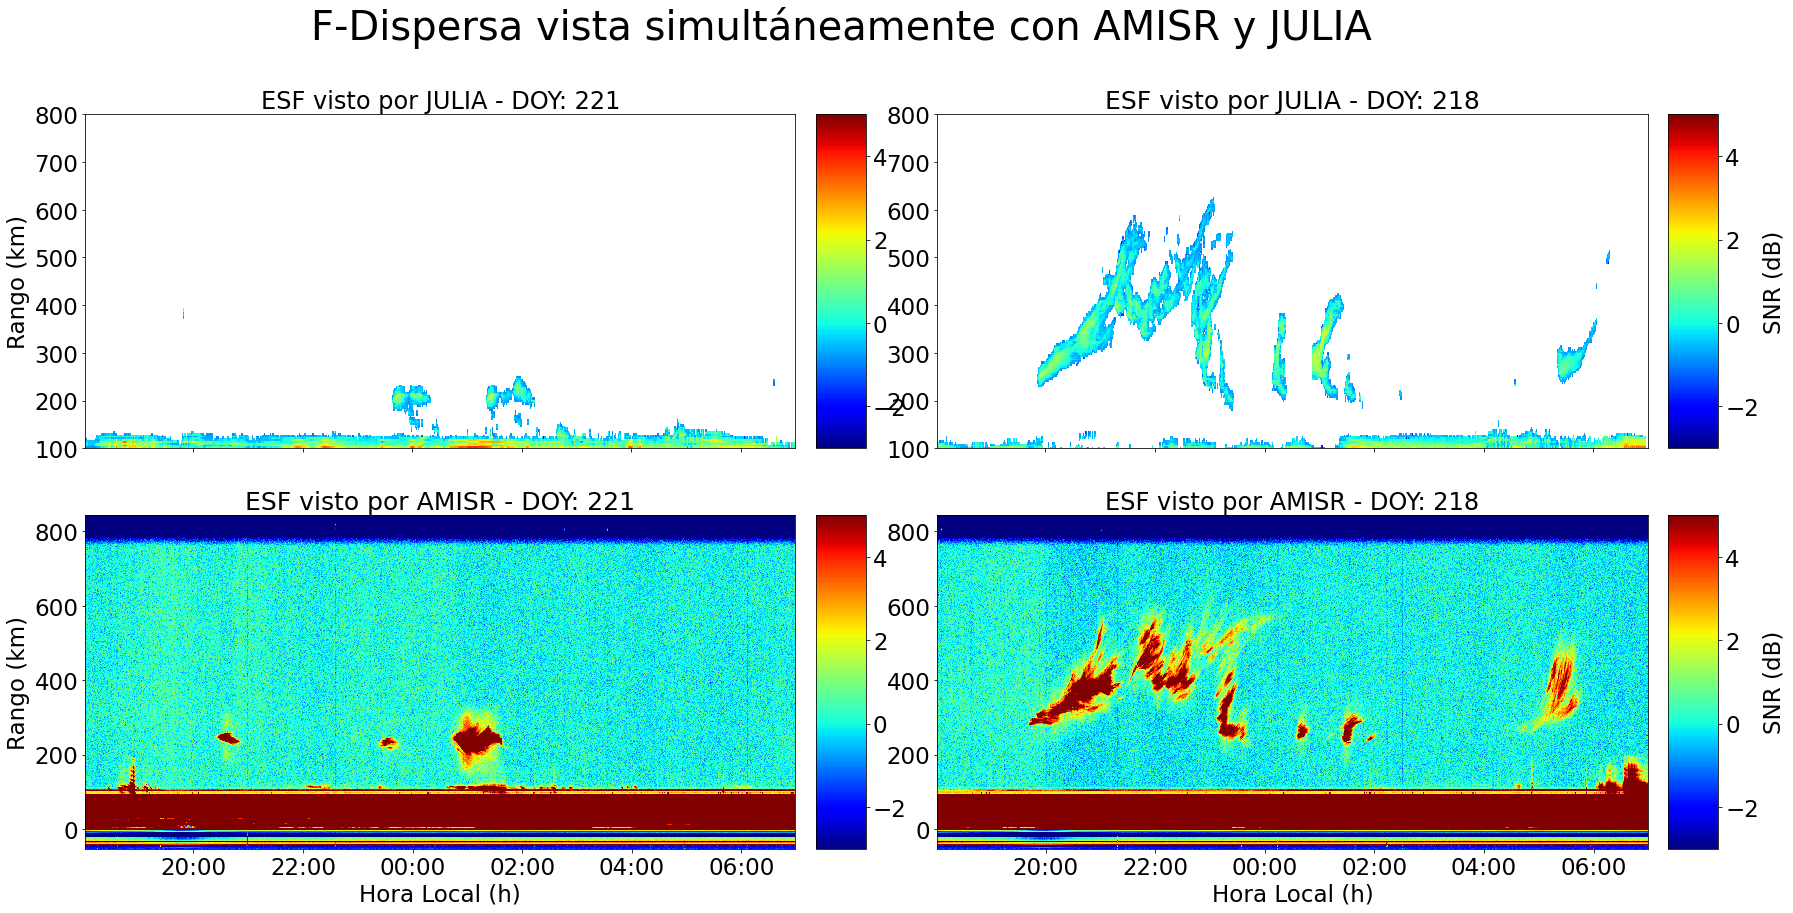

In [8]:
dir_aux = '/home/juanpablo/Desktop-JRO/Plots-Boletines/%d' % year
dir_plots = dir_aux +os.sep + GetMonth(month)
date_format = mdates.DateFormatter('%H:%M')
fontSize = 23
fig, axs = plt.subplots(2, 2,figsize=(28, 15),squeeze=False)
fig.suptitle('F-Dispersa vista simultáneamente con AMISR y JULIA', fontsize=40)

clrs = axs[0,0].pcolormesh(mdates.date2num(dt_julia1), height_julia1, snr_julia1,cmap='jet')
axs[0,0].xaxis_date()
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_xlabel("Hora Local (h)", fontsize=fontSize)
axs[0,0].set_ylabel("Rango (km)", fontsize=fontSize)
axs[0,0].tick_params(axis='x', labelsize=fontSize)#, rotation=0)
axs[0,0].tick_params(axis='y', labelsize=fontSize)
axs[0,0].set_title('ESF visto por JULIA - DOY: %d' % doy1, fontsize=24)
#axs[0,0].xticks(rotation=0)
axs[0,0].set_ylim(100,800)
fig.autofmt_xdate()
plt.setp( axs[0,0].xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=axs[0,0].get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
#cb.set_label(r'$dB$', fontsize=16)
cb.mappable.set_clim(-3,5)
cb.ax.tick_params(labelsize=fontSize) 
##################################################################################################
#fig, axs = plt.subplots(2, 2,figsize=(28, 15),squeeze=False)
clrs = axs[0,1].pcolormesh(mdates.date2num(dt_julia2), height_julia2, snr_julia2,cmap='jet')
axs[0,1].xaxis_date()
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_ylim(100,800)
#axs[0,1].set_xlabel("Hora Local (h)", fontsize=16)
#axs[0,1].set_ylabel("Rango (km)", fontsize=16)
axs[0,1].tick_params(axis='x', labelsize=fontSize)#, rotation=0)
axs[0,1].tick_params(axis='y', labelsize=fontSize)
axs[0,1].set_title('ESF visto por JULIA - DOY: %d' % doy2, fontsize=fontSize+2)
#axs[0,0].xticks(rotation=0)
fig.autofmt_xdate()
plt.setp( axs[0,1].xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=axs[0,1].get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
cb.set_label(r'SNR (dB)', fontsize=fontSize)
cb.mappable.set_clim(-3,5)
cb.ax.tick_params(labelsize=fontSize) 
######################################################################################################
clrs = axs[1,0].pcolormesh(mdates.date2num(dt_amisr1), height_amisr1, snr_amisr1.T,cmap='jet')
axs[1,0].xaxis_date()
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_xlabel("Hora Local (h)", fontsize=fontSize)
axs[1,0].set_ylabel("Rango (km)", fontsize=fontSize)
axs[1,0].tick_params(axis='x', labelsize=fontSize)#, rotation=0)
axs[1,0].tick_params(axis='y', labelsize=fontSize)
axs[1,0].set_title('ESF visto por AMISR - DOY: %d' % doy1, fontsize=fontSize+2)
#axs[0,0].xticks(rotation=0)
fig.autofmt_xdate()
plt.setp( axs[1,0].xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=axs[1,0].get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
#cb.set_label(r'SNR (dB)', fontsize=16)
cb.mappable.set_clim(-3,5)
cb.ax.tick_params(labelsize=fontSize) 

#####################################################################################################

clrs = axs[1,1].pcolormesh(mdates.date2num(dt_amisr2), height_amisr2, snr_amisr2.T,cmap='jet')
axs[1,1].xaxis_date()
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_xlabel("Hora Local (h)", fontsize=fontSize)
#axs[1,1].set_ylabel("Rango (km)", fontsize=20)
axs[1,1].tick_params(axis='x', labelsize=fontSize)#, rotation=0)
axs[1,1].tick_params(axis='y', labelsize=fontSize)
axs[1,1].set_title('ESF visto por AMISR - DOY: %d' % doy2, fontsize=24)
#axs[0,0].xticks(rotation=0)
fig.autofmt_xdate()
plt.setp( axs[1,1].xaxis.get_majorticklabels(), rotation=0,ha='center' )
box=axs[1,1].get_position()
cbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
cb=plt.colorbar(clrs,cax=cbarax)        
cb.set_label(r'SNR (dB)', fontsize=fontSize)
cb.mappable.set_clim(-3,5)
cb.ax.tick_params(labelsize=fontSize) 
savename = dir_plots + os.sep + 'Figura1-%s.png' % GetMonth(month)
plt.savefig(savename)